In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 1.
Постройте алгоритм метода опорных векторов типа "C-classification" с параметром C = 1, используя ядро "linear". Визуализируйте разбиение пространства признаков на области с помощью полученной модели. Выведите количество полученных опорных векторов, а также ошибки классификации на обучающей и тестовой выборках.

In [11]:
train = pd.read_csv('svmdata1.txt', sep="\t")
train.head()

,X1,X2,Color
1,0.148747,0.131288,red
2,-0.048815,0.036423,red
3,-0.062391,-0.234860,red
4,0.354839,-0.177403,red
5,-0.145617,0.081265,red


In [9]:
test = pd.read_csv("svmdata1test.txt", sep="\t")
test.head()

,X1,X2,Color
1,0.034865,-0.002933,red
2,-0.510895,-0.168982,red
3,0.117193,-0.189160,red
4,0.194224,0.087315,red
5,0.223874,0.082128,red


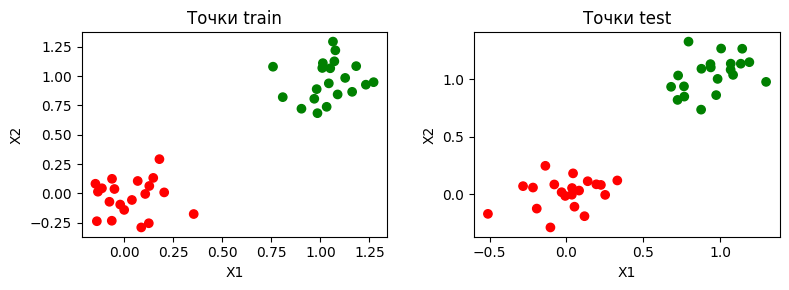

In [59]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].scatter(train.X1, train.X2, c=train.Color)
axes[0].set_title("Точки train")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

axes[1].scatter(test.X1, test.X2, c=test.Color)
axes[1].set_title("Точки test")
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X2")

plt.tight_layout() 
plt.show()


In [25]:
train["Class"] = (train["Color"] == "green").astype(int)
test["Class"] = (test["Color"] == "green").astype(int)

In [28]:
X_train = train.drop(columns=["Color", "Class"])
X_train.head()


,X1,X2
1,0.148747,0.131288
2,-0.048815,0.036423
3,-0.062391,-0.234860
4,0.354839,-0.177403
5,-0.145617,0.081265


In [29]:
y_train = train["Class"]
y_train.head()


1    0
2    0
3    0
4    0
5    0
Name: Class, dtype: int32

In [31]:
X_test = test.drop(columns=["Color", "Class"])
y_test = test["Class"]


In [45]:
clf = make_pipeline(StandardScaler(), SVC(C=1, kernel="linear"))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [51]:
prediction = clf.predict(X_test)
print(prediction)
print("Test accuracy: ", accuracy_score(y_test, prediction))
print("Train accuracy: " , accuracy_score(y_train, clf.predict(X_train)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Test accuracy:  1.0
Train accuracy:  1.0


1.29846102797255

c:\Users\slesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\slesh\AppData\Local\Temp\ipykernel_19972\1574248059.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(test["X1"], test["X2"], c=test["Color"], cmap=plt.cm.coolwarm, edgecolors='k')


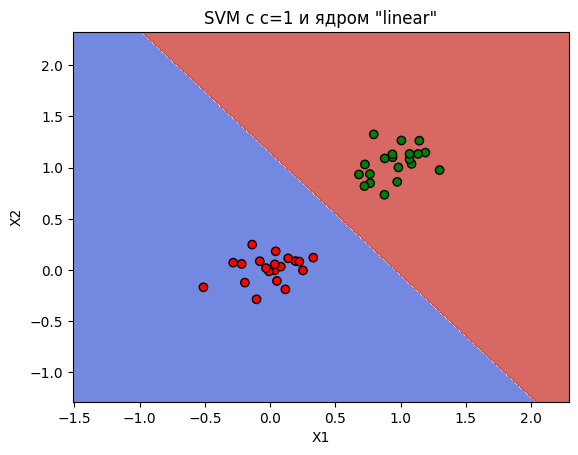

In [48]:
x_min, x_max = test["X1"].min() - 1, test["X1"].max() + 1
y_min, y_max = test["X2"].min() - 1, test["X2"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(test["X1"], test["X2"], c=test["Color"], cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM с c=1 и ядром "linear"')
# plt.savefig("svcc=1linear.png")
plt.show()


In [53]:
# Получите количество опорных векторов
n_support_vectors = clf.named_steps['svc'].n_support_
print("Количество опорных векторов:", n_support_vectors)

Количество опорных векторов: [1 1]


Количество опорных векторов: [1 1] - один опорный вектор для первого класса, один для второго

# 2.
Используя алгоритм метода опорных векторов типа "C-classification" с линейным ядром, добейтесь нулевой ошибки сначала на обучающей выборке, а затем на тестовой, путем изменения параметра C. Выберите оптимальное значение данного параметра и объясните свой выбор. Всегда ли нужно добиваться минимизации ошибки на обучающей выборке?

In [62]:
train = pd.read_csv('svmdata2.txt', sep="\t")

In [65]:
test = pd.read_csv("svmdata2test.txt", sep="\t")

,X1,X2,Colors
1,0.468931,0.366201,red
2,-0.382492,-0.534043,red
3,0.196077,0.119565,red
4,-0.065208,-0.749868,red
5,-0.183676,-0.733105,red


In [66]:
train["Class"] = (train["Colors"] == "green").astype(int)
test["Class"] = (test["Colors"] == "green").astype(int)
X_test = test.drop(columns=["Colors", "Class"])
y_test = test["Class"]
y_train = train["Class"]
X_train = train.drop(columns=["Colors", "Class"])

In [82]:
C_values = [i for i in np.arange(1, 300, 1)]
different_c_test = {}
for c in C_values:
    clf = make_pipeline(StandardScaler(), SVC(C=c, kernel="linear"))
    clf.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, clf.predict(X_test))
    train_error = 1 - accuracy_score(y_train, clf.predict(X_train))
    different_c_test[c] = [test_error, train_error]

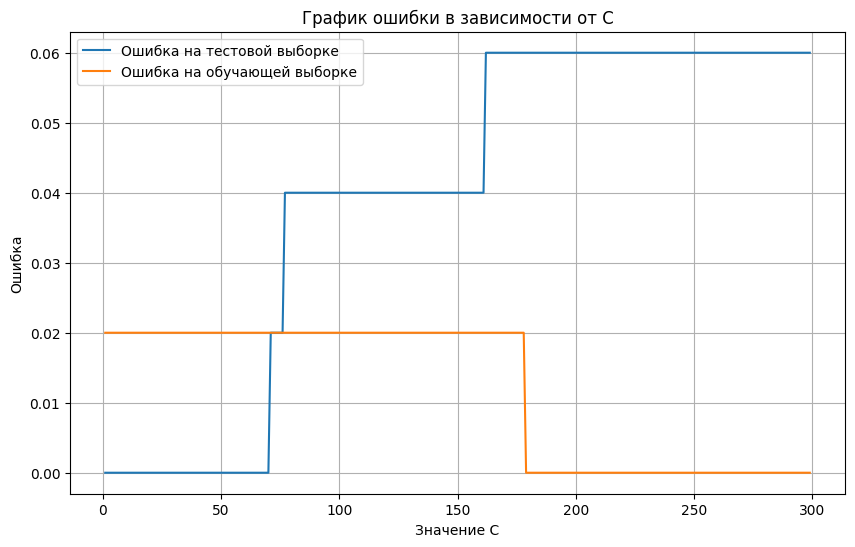

In [83]:
import matplotlib.pyplot as plt

test_errors = [error[0] for error in different_c_test.values()]
train_errors = [error[1] for error in different_c_test.values()]

C_values = list(different_c_test.keys())

plt.figure(figsize=(10, 6))
plt.plot(C_values, test_errors, label="Ошибка на тестовой выборке")
plt.plot(C_values, train_errors, label="Ошибка на обучающей выборке")
plt.xlabel("Значение C")
plt.ylabel("Ошибка")
plt.title("График ошибки в зависимости от C")
plt.legend()
plt.grid()
plt.show()

# 3.
Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества ошибок на тестовой выборке. Попробуйте различные значения параметра degree для полиномиального ядра.

In [4]:
data = pd.read_csv('svmdata3.txt', sep="\t")
train, test = train_test_split(data, test_size=0.2)
train["Class"] = (train["Colors"] == "green").astype(int)
test["Class"] = (test["Colors"] == "green").astype(int)
X_test = test.drop(columns=["Colors", "Class"])
y_test = test["Class"]
y_train = train["Class"]
X_train = train.drop(columns=["Colors", "Class"])

In [5]:
kernels = ["poly", "rbf", "sigmoid"]
different_kernels_test = {}
for kernel in kernels:
    clf = make_pipeline(StandardScaler(), SVC(C=1, kernel=kernel))
    clf.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, clf.predict(X_test))
    different_kernels_test[kernel] = test_error
different_kernels_test

{'poly': 0.4, 'rbf': 0.09999999999999998, 'sigmoid': 0.5}

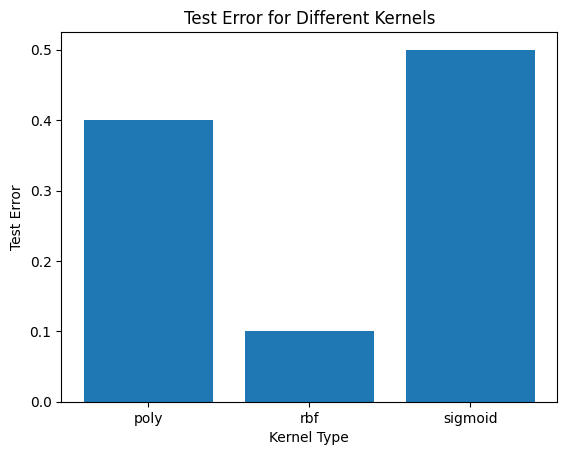

In [8]:
plt.bar(different_kernels_test.keys(), different_kernels_test.values())
plt.xlabel('Kernel Type')
plt.ylabel('Test Error')
plt.title('Test Error for Different Kernels')
plt.show()

In [9]:
degrees = [i for i in range(0, 21)]
different_degrees_test = {}
for degree in degrees:
    clf = make_pipeline(StandardScaler(), SVC(C=1, kernel="poly", degree=degree))
    clf.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, clf.predict(X_test))
    different_degrees_test[degree] = test_error
different_degrees_test

{0: 0.4,
 1: 0.4,
 2: 0.09999999999999998,
 3: 0.4,
 4: 0.15000000000000002,
 5: 0.4,
 6: 0.15000000000000002,
 7: 0.55,
 8: 0.19999999999999996,
 9: 0.5,
 10: 0.19999999999999996,
 11: 0.5,
 12: 0.19999999999999996,
 13: 0.55,
 14: 0.19999999999999996,
 15: 0.55,
 16: 0.19999999999999996,
 17: 0.6,
 18: 0.19999999999999996,
 19: 0.6,
 20: 0.19999999999999996}

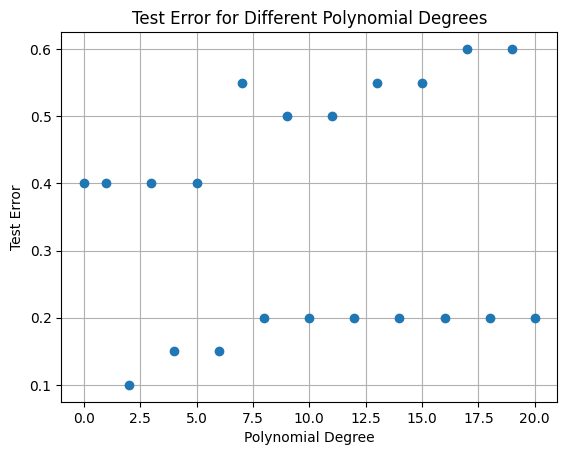

In [12]:
plt.plot(different_degrees_test.keys(), different_degrees_test.values(), marker='o', linestyle="None")
plt.xlabel('Polynomial Degree')
plt.ylabel('Test Error')
plt.title('Test Error for Different Polynomial Degrees')
plt.grid(True)
plt.show()

# 4.
Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества ошибок на тестовой выборке.

In [34]:
train = pd.read_csv('svmdata4.txt', sep="\t")
test = pd.read_csv('svmdata4test.txt', sep="\t")
train["Class"] = (train["Colors"] == "green").astype(int)
test["Class"] = (test["Colors"] == "green").astype(int)
X_test = test.drop(columns=["Colors", "Class"])
y_test = test["Class"]
y_train = train["Class"]
X_train = train.drop(columns=["Colors", "Class"])

In [35]:
kernels = ["poly", "rbf", "sigmoid"]
different_kernels_test = {}
for kernel in kernels:
    clf = make_pipeline(StandardScaler(), SVC(C=1, kernel=kernel))
    clf.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, clf.predict(X_test))
    different_kernels_test[kernel] = test_error
different_kernels_test

{'poly': 0.13, 'rbf': 0.10999999999999999, 'sigmoid': 0.18500000000000005}

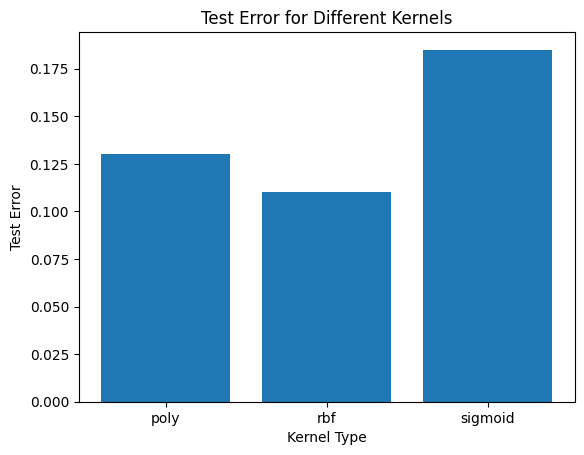

In [36]:
plt.bar(different_kernels_test.keys(), different_kernels_test.values())
plt.xlabel('Kernel Type')
plt.ylabel('Test Error')
plt.title('Test Error for Different Kernels')
plt.show()

# 5.
Среди ядер "polynomial", "radial" и "sigmoid" выберите оптимальное в плане количества ошибок на тестовой выборке. Изменяя значение параметра gamma, продемонстрируйте эффект переобучения, выполните при этом визуализацию разбиения пространства признаков на области.

In [37]:
train = pd.read_csv('svmdata5.txt', sep="\t")
test = pd.read_csv('svmdata5test.txt', sep="\t")
train["Class"] = (train["Colors"] == "green").astype(int)
test["Class"] = (test["Colors"] == "green").astype(int)
X_test = test.drop(columns=["Colors", "Class"])
y_test = test["Class"]
y_train = train["Class"]
X_train = train.drop(columns=["Colors", "Class"])

In [44]:
gammas = [i for i in np.arange(0, 5, 0.1)]
different_gammas_test = {}
for gamma in gammas:
    clf = make_pipeline(StandardScaler(), SVC(gamma=gamma))
    clf.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, clf.predict(X_test))
    different_gammas_test[gamma] = test_error
#different_gammas_test

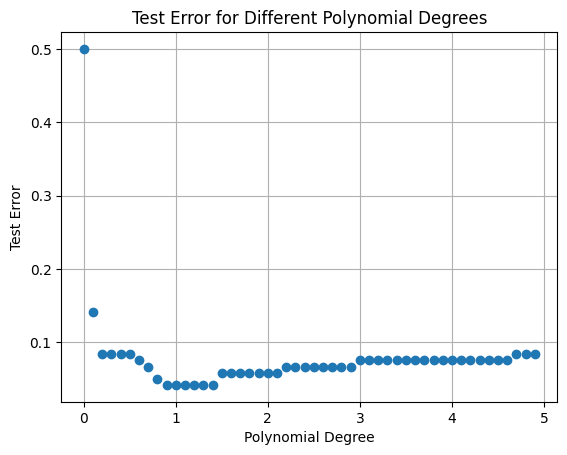

In [45]:
plt.plot(different_gammas_test.keys(), different_gammas_test.values(), marker='o', linestyle="None")
plt.xlabel('Polynomial Degree')
plt.ylabel('Test Error')
plt.title('Test Error for Different Polynomial Degrees')
plt.grid(True)
plt.show()

# 6.
Постройте алгоритм метода опорных векторов типа "eps-regression" с параметром C = 1, используя ядро "radial". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат.

In [64]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [56]:
data = pd.read_csv('svmdata6.txt', sep="\t")
data.head()

,X,Y
1,0.00,-0.035662
2,0.05,0.059784
3,0.10,-0.111344
4,0.15,0.099728
5,0.20,0.297808


In [61]:
data = pd.read_csv('svmdata6.txt', sep="\t")
train, test = train_test_split(data, test_size=0.2)
X_test = test.drop(columns=["Y"])
y_test = test["Y"]
y_train = train["Y"]
X_train = train.drop(columns=["Y"])

In [72]:
epsilons = [i for i in np.arange(0, 2, 0.1)]
different_epsilons_test = {}
for epsilon in epsilons:
    regr = make_pipeline(StandardScaler(), SVR(C=1.0, kernel="rbf", epsilon=epsilon))
    regr.fit(X_train, y_train)
    mse = mean_squared_error(y_test, regr.predict(X_test))
    different_epsilons_test[epsilon] = mse
different_epsilons_test


{0.0: 0.016617931553409657,
 0.1: 0.016122165757823888,
 0.2: 0.023182670638632382,
 0.30000000000000004: 0.0386679380669633,
 0.4: 0.06505496813068491,
 0.5: 0.10449641472803521,
 0.6000000000000001: 0.15634214030711222,
 0.7000000000000001: 0.21588316213486886,
 0.8: 0.28617405632085535,
 0.9: 0.36749252947085004,
 1.0: 0.4596940795806954,
 1.1: 0.5627935695034499,
 1.2000000000000002: 0.5994769738144002,
 1.3: 0.5994769738144002,
 1.4000000000000001: 0.5994769738144002,
 1.5: 0.5994769738144002,
 1.6: 0.5994769738144002,
 1.7000000000000002: 0.5994769738144002,
 1.8: 0.5994769738144002,
 1.9000000000000001: 0.5994769738144002}

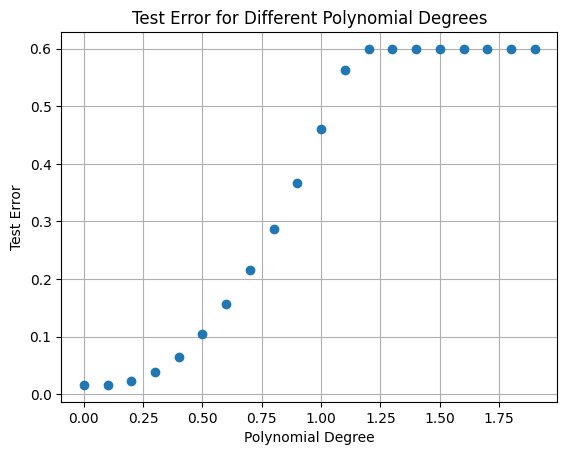

In [73]:
plt.plot(different_epsilons_test.keys(), different_epsilons_test.values(), marker='o', linestyle="None")
plt.xlabel('Polynomial Degree')
plt.ylabel('Test Error')
plt.title('Test Error for Different Polynomial Degrees')
plt.grid(True)
plt.show()